In [131]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings

In [132]:
# load data
data = pd.read_csv("D:\D\Machine Learning\data\Medical Cost Personal Datasets\insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [133]:
# get information of data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [134]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

As per the output, there are three columns with object data type which need to convert to labeled for model. 

In [135]:
# There are 0 null value in dataset
data.isnull().sum()
group_age = data.groupby('age')
group_age.indices

{np.int64(18): array([   1,   22,   31,   46,   50,   57,  102,  121,  157,  161,  172,
         181,  194,  236,  250,  270,  295,  354,  359,  369,  399,  427,
         442,  469,  471,  482,  492,  525,  529,  564,  571,  600,  612,
         623,  648,  663,  710,  728,  759,  781,  803,  808,  822,  866,
         898,  911,  938,  940,  942, 1023, 1033, 1041, 1080, 1095, 1150,
        1163, 1170, 1204, 1212, 1215, 1244, 1248, 1282, 1283, 1296, 1315,
        1317, 1334, 1335]),
 np.int64(19): array([   0,   15,   32,   35,   65,  106,  126,  133,  136,  149,  168,
         195,  200,  223,  232,  238,  248,  259,  263,  276,  296,  311,
         349,  362,  385,  391,  410,  414,  430,  464,  472,  487,  490,
         503,  513,  526,  559,  565,  581,  584,  604,  618,  636,  681,
         723,  747,  773,  791,  807,  897,  899,  926,  943,  960,  973,
        1016, 1026, 1039, 1129, 1139, 1156, 1195, 1196, 1251, 1291, 1299,
        1313, 1316]),
 np.int64(20): array([  64,  105, 

In [136]:
# check duplicate values and remove it
duplicate_value = data[data.duplicated()]
totol_duplicate_value = data.duplicated().sum()

print(duplicate_value)
print("Total duplicate values: ", totol_duplicate_value)

data = data.drop_duplicates()
print("Total duplicate values after action: ", data.duplicated().sum())

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
Total duplicate values:  1
Total duplicate values after action:  0


In [137]:
# Get columns name based on theri trpe
column_data_type_list = data.dtypes.tolist()
column_data_type_list = list(dict.fromkeys(column_data_type_list))
column_data_type_list

[dtype('int64'), dtype('O'), dtype('float64')]

In [138]:
# get columns name as per the data type
column_with_int = list(data.select_dtypes(include='int64'))
column_with_float = list(data.select_dtypes(include='float64'))
column_with_obj = list(data.select_dtypes(include='object'))

In [139]:
# Label encoding
from sklearn import preprocessing
labels = preprocessing.LabelEncoder()
for i in column_with_obj:
    data[i] = labels.fit_transform(data[i])

data

C:\Users\jaini\AppData\Local\Temp\ipykernel_24352\2756928652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = labels.fit_transform(data[i])
C:\Users\jaini\AppData\Local\Temp\ipykernel_24352\2756928652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = labels.fit_transform(data[i])
C:\Users\jaini\AppData\Local\Temp\ipykernel_24352\2756928652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [140]:
# Convert float values in int
for i in column_with_float:
    data[i] = data[i].astype('int64')
data

C:\Users\jaini\AppData\Local\Temp\ipykernel_24352\519034727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].astype('int64')
C:\Users\jaini\AppData\Local\Temp\ipykernel_24352\519034727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].astype('int64')


,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,1,3,16884
1,18,1,33,1,0,2,1725
2,28,1,33,3,0,2,4449
3,33,1,22,0,0,1,21984
4,32,1,28,0,0,1,3866
...,...,...,...,...,...,...,...
1333,50,1,30,3,0,1,10600
1334,18,0,31,0,0,0,2205
1335,18,0,36,0,0,2,1629
1336,21,0,25,0,0,3,2007


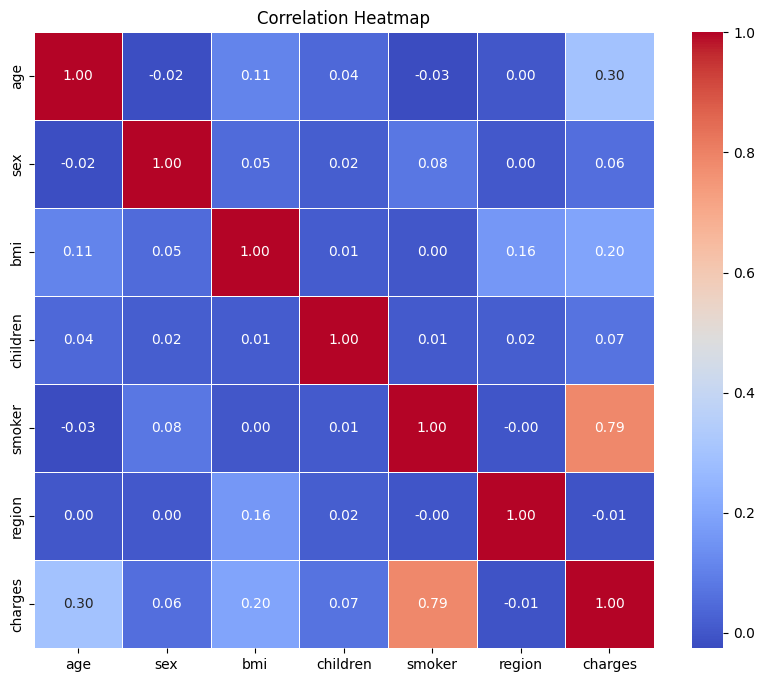

In [141]:
# Now start data visualization for understanign trand
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [142]:
# Prepare data for model
from sklearn.model_selection import train_test_split
scale = preprocessing.StandardScaler()

X = data.drop(columns='charges', axis=1)
X = preprocessing.scale(X)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [143]:
# Build model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R^2 Error:", r2_score(y_test, y_pred))
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

R^2 Error: 0.7993966985508459
RMSE:  5973.61775823313


In [144]:
# check overfiting with it
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mae = mean_squared_error(y_train, y_train_pred)
test_mae = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")
print(f"Training R2: {train_r2}")
print(f"Testing R2: {test_r2}")

Training MAE: 36778077.5241157
Testing MAE: 35684109.12147821
Training R2: 0.73893804288774
Testing R2: 0.7993966985508459


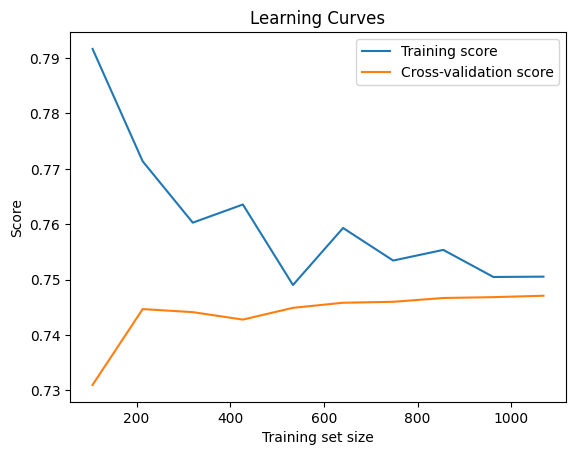

In [145]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()

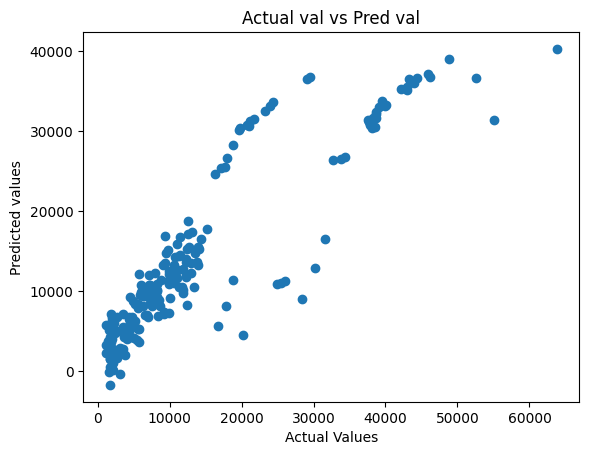

In [146]:
# Making a visualization of prediction vs actual values for better understanding
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Actual val vs Pred val")
plt.show()

900       478.049313
1064      407.520816
1256    -3091.510482
298      6568.707173
237     -4809.310786
            ...     
422      6082.983430
306     15571.703472
231       652.499300
462     -2507.931239
259      7228.319907
Name: charges, Length: 201, dtype: float64


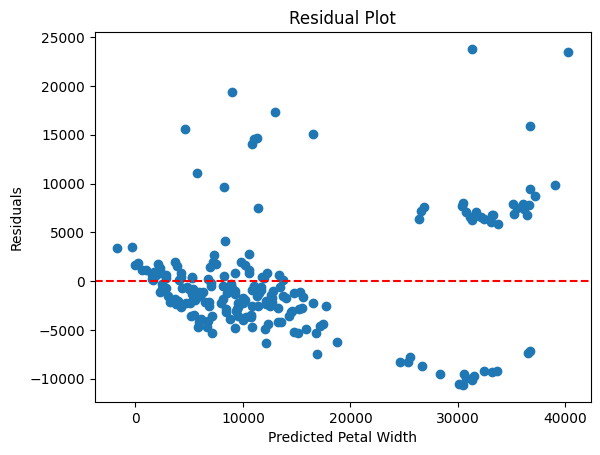

In [147]:
residuals = y_test - y_pred
print(residuals)
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Petal Width')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Make a pipe line in linear regression for better studing model

In [148]:
# Build Polynomial model for checking
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_y_pred = poly_model.predict(X_test)

print("R^2 Error:", r2_score(y_test, poly_y_pred))
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", poly_rmse)

R^2 Error: 0.8797868852693699
RMSE:  5973.61775823313


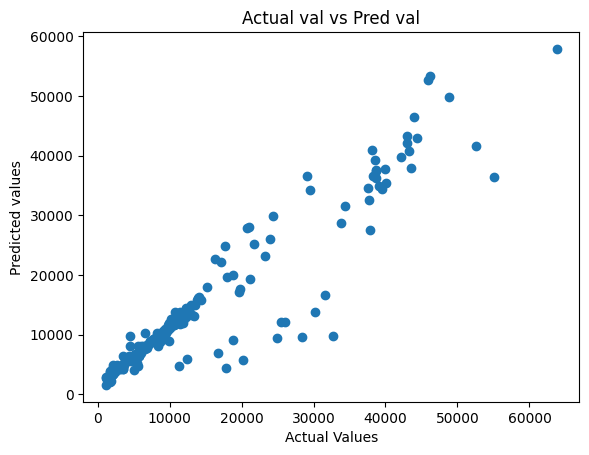

In [149]:
plt.scatter(y_test, poly_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Actual val vs Pred val")
plt.show()

900       -61.202697
1064     -703.932845
1256    -2347.653156
298      2583.820934
237     -1334.519139
            ...     
422      4298.291656
306     14411.326165
231     -1743.216151
462     -2678.340780
259      5037.165249
Name: charges, Length: 201, dtype: float64


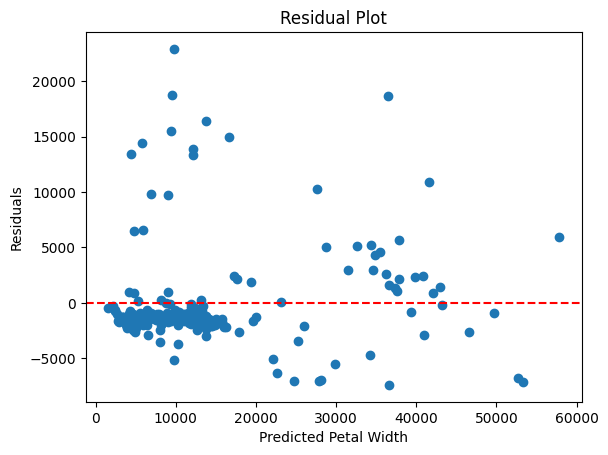

In [150]:
residuals = y_test - poly_y_pred
print(residuals)
plt.scatter(poly_y_pred, residuals)
plt.xlabel('Predicted Petal Width')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()